In [1]:
from funcs import cart2sph, sph2cart, conv2GalacticCoords
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
from scipy.constants import speed_of_light
# %matplotlib widget

In [2]:
cart = (-1, 0.2, 0)
cart_norm = cart / np.linalg.norm(cart)
print(cart_norm)

pol_norm = cart2sph(cart_norm)
# print(pol_norm)

print(sph2cart(pol_norm))

[-0.98058068  0.19611614  0.        ]
(-0.9805806756909201, 0.19611613513818427, 6.123233995736766e-17)


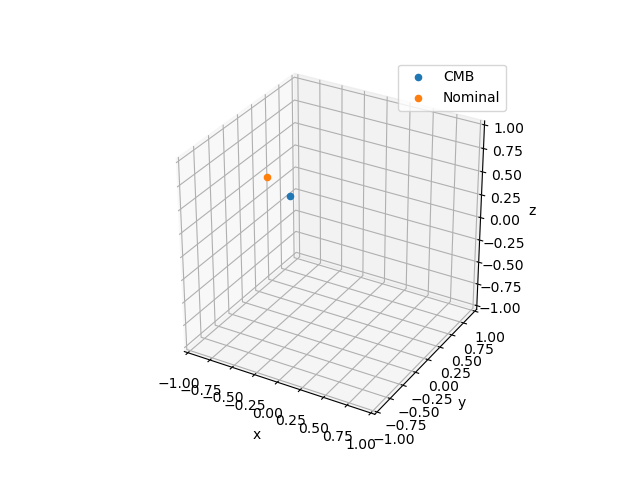

In [41]:
%matplotlib widget
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': '3d', 'aspect': 'auto'})
ax.set_box_aspect((1,1,1))
ax.set_xlim((-1,1))
ax.set_ylim((-1,1))
ax.set_zlim((-1,1))

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

scat = ax.scatter(CMBDipoleVector[0],CMBDipoleVector[1],CMBDipoleVector[2],label='CMB')
scat = ax.scatter(nominalVector[0],nominalVector[1],nominalVector[2],label='Nominal')

ax.legend()


(0.9999995000000417, 0.0009999998333333417, 6.123233995736766e-17)

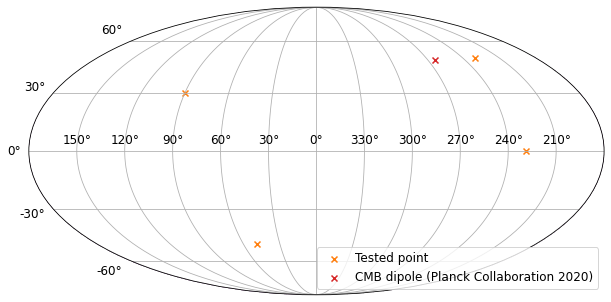

In [7]:
nside = 16
npix = hp.nside2npix(nside)
healpy_map = np.zeros(npix)

# plt.scatter takes in (az, pol) i.e. yes phi, theta
# the issue here is that scatter takes in values for phi between -pi and pi (lest it go off the grid) ,
# but I have used (0, 2 pi) implicitly for sph2cart (not cart2sph though, which is not used by
# the core functions).
# for theta, we want 0 to refer to the North pole so that is modified too

az = [4, 4, 4 - np.pi,np.pi/2]
pol = [0.7, np.pi/2, np.pi - 0.7, np.pi/2 - 30*np.pi/180]
az, pol = conv2GalacticCoords(az,pol)

pol_CMB, az_CMB = [48.253*np.pi/180], [264.021 * \
    np.pi/180]

# the polar value is already properly adjusted so polar_conv is set to false
#(0.73,4.6)
az_CMB = conv2GalacticCoords(az_CMB,pol_CMB,polar_conv=False)

hp.projview(healpy_map,
            projection_type='mollweide',
            coord=["G"],
            graticule=True,
            graticule_labels=True,
            color="white",
            cbar=False,
            longitude_grid_spacing=30)

plt.scatter(
            az,
            pol,
            marker='x',
            color='tab:orange',
            label='Tested point')

plt.scatter(
            az_CMB,
            pol_CMB,
            marker='x',
            color='tab:red',
            label='CMB dipole (Planck Collaboration 2020)')

plt.legend(
            loc='lower right',
            fontsize=12)

In [2]:
pol, az, v = np.pi/2 - (48.253*np.pi/180), 264.021 * \
    np.pi/180, (369.82*1000)/speed_of_light
CMBDipoleVector = sph2cart((pol, az))
print(CMBDipoleVector)
nominalVector = sph2cart((0.7,4))

(-0.06935679209477573, -0.662220511246901, 0.7460922395215054)
